In [36]:
import unittest
from equadratures import *
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X = np.linspace(0, 1, num=100)
y = np.concatenate((25*(X[0:50]-0.25)**2 - 1.0625, 25*(X[50:100]-0.75)**2 - 1.0625))

X, y = unison_shuffled_copies(X,y)
x_train, x_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

x_train = np.reshape(x_train, (x_train.shape[0], 1))
x_test = np.reshape(x_test, (x_test.shape[0], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

tree = polytree.PolyTree()
tree.fit(x_train, y_train)
_, _, exhaustive_r_value, _, _ = st.linregress(y_test, tree.predict(x_test).reshape(-1))

tree = polytree.PolyTree(search='uniform')
tree.fit(x_train, y_train)
_, _, uniform_r_value, _, _ = st.linregress(y_test, tree.predict(x_test).reshape(-1))
print(exhaustive_r_value ** 2, uniform_r_value ** 2)

0.999308159405147 0.9989737612381582


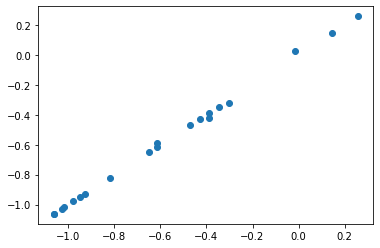

In [37]:
from matplotlib import pyplot
pyplot.scatter(y_test, tree.predict(x_test).reshape(-1))

In [23]:
print(len(X), len(y))

100 100


In [22]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])